# 620 - Project1 Network Analysis: Centrality Measures

Maliat Islam, Layla Quinones, and Karim Hammoud


#### **Data Collection:**
The dataset we are going to use is Popular Baby Names from NYC Open Data. The name of the dataset is Popular Baby Name. The names are stored by Sex and Ethnic group. Each records represent the popularity of a name.This assignment is going to calculate popular baby names among certain ethnic groups.

#### Source:
In this project we choose the data set of Popular Baby Names in NYC We can access the data via API on the web from NYC open data

We pull the data from NYC open source API and added the data is stored in a CSV format.

<a href="https://data.cityofnewyork.us/Health/Popular-Baby-Names/25th-nujf" target="_blank">hyperlinked words</a>

The dataset has nodes and edges and
Each ethnic groups have differeent degrees.

#### Setting up the packages for Python.

Our data has been downloaded using Sodapy. Sodapy is a python client for the Socrata Open Data API.
we will perform sertain analysis on our dataset. They are described below.\

In [3]:
import networkx as net, pandas as pd, numpy as np, re, matplotlib.pyplot as plt, warnings, seaborn as sns

# import Socrata to pull the API
from sodapy import Socrata

#### Dataset Selection

NYC OpenData was accessed using the Socrata API as below, we created a client connection and store the data in a pandas dataframe.

In [4]:

client = Socrata("data.cityofnewyork.us", None)

results = client.get("25th-nujf", limit=2000)


# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
warnings.filterwarnings('ignore')

In [10]:
df.head()

,brth_yr,gndr,ethcty,nm,cnt,rnk
0,2017,FEMALE,ASIAN AND PACIFIC ISLANDER,Olivia,136,1
1,2017,FEMALE,ASIAN AND PACIFIC ISLANDER,Emma,109,2
2,2017,FEMALE,ASIAN AND PACIFIC ISLANDER,Chloe,103,3
3,2017,FEMALE,ASIAN AND PACIFIC ISLANDER,Sophia,86,4
4,2017,FEMALE,ASIAN AND PACIFIC ISLANDER,Mia,79,5


In [11]:
df.describe()

,brth_yr,gndr,ethcty,nm,cnt,rnk
count,2000,2000,2000,2000,2000,2000
unique,2,2,4,1209,166,97
top,2017,FEMALE,WHITE NON HISPANIC,Jordan,10,68
freq,1973,1039,727,6,156,47


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   brth_yr  2000 non-null   object
 1   gndr     2000 non-null   object
 2   ethcty   2000 non-null   object
 3   nm       2000 non-null   object
 4   cnt      2000 non-null   object
 5   rnk      2000 non-null   object
dtypes: object(6)
memory usage: 93.9+ KB


### Network Charecterization:
Firstly data will be explored and the number of edges and nodes will be identified.

In [13]:
nm = list(df.nm.unique())
gndr = list(df.gndr.unique())
brth_yr = list(df.brth_yr.unique())
ethcty = list(df.ethcty.unique())

In [19]:
G = net.Graph()

G = net.from_pandas_edgelist(df, source='nm', target='ethcty',edge_attr=True)

print(net.info(G))

Name: 
Type: Graph
Number of nodes: 1213
Number of edges: 1956
Average degree:   3.2251


In [20]:
gd=pd.DataFrame(G.degree(ethcty)).sort_values(1,ascending =False).rename({0:'Ethnicity:',1:'DEGREE'}, axis=1).set_index("Ethnicity:")
print("Degree of Ethnicity: \n", gd)


Degree of Ethnicity: 
                             DEGREE
Ethnicity:                        
WHITE NON HISPANIC             716
HISPANIC                       555
ASIAN AND PACIFIC ISLANDER     346
BLACK NON HISPANIC             339


In [22]:
G2 = net.Graph()

G2 = net.from_pandas_edgelist(df, source='nm', target='gndr',edge_attr=True)

print(net.info(G2))

gd2=pd.DataFrame(G2.degree(gndr)).sort_values(1,ascending =False).rename({0:'gndr:',1:'DEGREE'}, axis=1).set_index("gndr:")
print("Degree of Ethnicity: \n", gd2)


Name: 
Type: Graph
Number of nodes: 1211
Number of edges: 1227
Average degree:   2.0264
Degree of Ethnicity: 
         DEGREE
gndr:         
FEMALE     650
MALE       577


### Network Visualization:

The network  will be visualized by for each different ethnic categories.

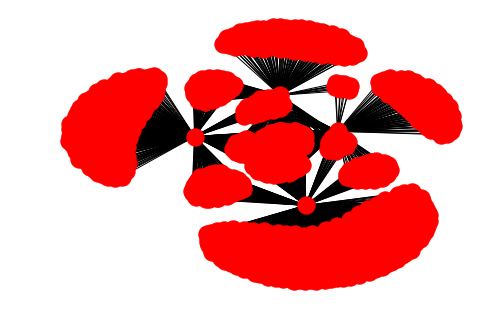

In [33]:
net.draw(G, with_lables =True)
plt.show()

In [ ]:
net.draw(G2, with_lables =True)
plt.show()

In [29]:
net.write_gexf(G2, 'fb.gexf')

### Centrality Measures¶

Centrality measures will be calculated to have understanding of important nodes within the network,and degree of interactions with other nodes. Degree centrality by category(ethnicity) will be calculated as well.

Statistical Analysis on Centrality Measure:
With centrality measures calculated on each nodes by category, we can calculate average across these groups and apply t-tests to see if there are statistically significant differences in average degree cewntrality and Eigenvector centrality across ethnic groups.


In [31]:
# create dataframe of graph centrality measures
cm = pd.DataFrame()
cm['degree'] = net.degree_centrality(G).values()
cm['betweenness'] = net.betweenness_centrality(G).values()
cm['closeness'] = net.closeness_centrality(G).values()
cm['eigen'] = net.eigenvector_centrality_numpy(G).values() 
cm.index = list(G)

# view centrality measures across boroughs
dat = cm.reset_index()
dat.sort_values('degree' ,ascending = False).head(4)

,index,degree,betweenness,closeness,eigen
435,WHITE NON HISPANIC,0.590759,0.599343,0.550659,0.472934
286,HISPANIC,0.457921,0.401031,0.480380,0.387751
1,ASIAN AND PACIFIC ISLANDER,0.285479,0.185217,0.412105,0.266178
173,BLACK NON HISPANIC,0.279703,0.212405,0.410152,0.234802


In [32]:
network = pd.merge(df, cm, how='inner', left_on = 'ethcty', right_on = cm.index)
network.head()

,brth_yr,gndr,ethcty,nm,cnt,rnk,degree,betweenness,closeness,eigen
0,2017,FEMALE,ASIAN AND PACIFIC ISLANDER,Olivia,136,1,0.285479,0.185217,0.412105,0.266178
1,2017,FEMALE,ASIAN AND PACIFIC ISLANDER,Emma,109,2,0.285479,0.185217,0.412105,0.266178
2,2017,FEMALE,ASIAN AND PACIFIC ISLANDER,Chloe,103,3,0.285479,0.185217,0.412105,0.266178
3,2017,FEMALE,ASIAN AND PACIFIC ISLANDER,Sophia,86,4,0.285479,0.185217,0.412105,0.266178
4,2017,FEMALE,ASIAN AND PACIFIC ISLANDER,Mia,79,5,0.285479,0.185217,0.412105,0.266178


## Visualizing Centrality Measures

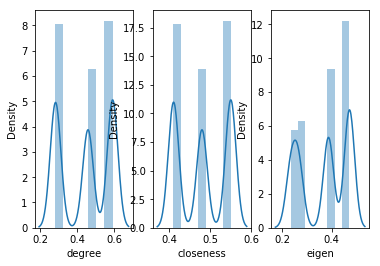

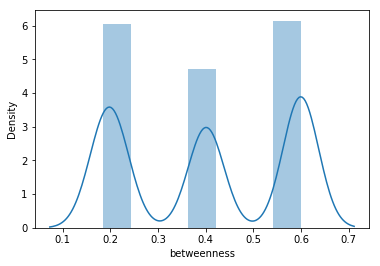

In [255]:
fig, ax = plt.subplots(1, 3)

sns.distplot(network.degree, ax=ax[0])
sns.distplot(network.closeness, ax=ax[1])
sns.distplot(network.eigen, ax=ax[2])

plt.show()

sns.distplot(network.betweenness)
plt.show()

## Correlation of Centrality Measures

In [246]:
# correlation between the measures centrality 
su_df = dat[['degree','betweenness','closeness','eigen']]
su_df.corr()

,degree,betweenness,closeness,eigen
degree,1.000000,0.990489,0.131335,0.904129
betweenness,0.990489,1.000000,0.128450,0.888938
closeness,0.131335,0.128450,1.000000,0.533911
eigen,0.904129,0.888938,0.533911,1.000000


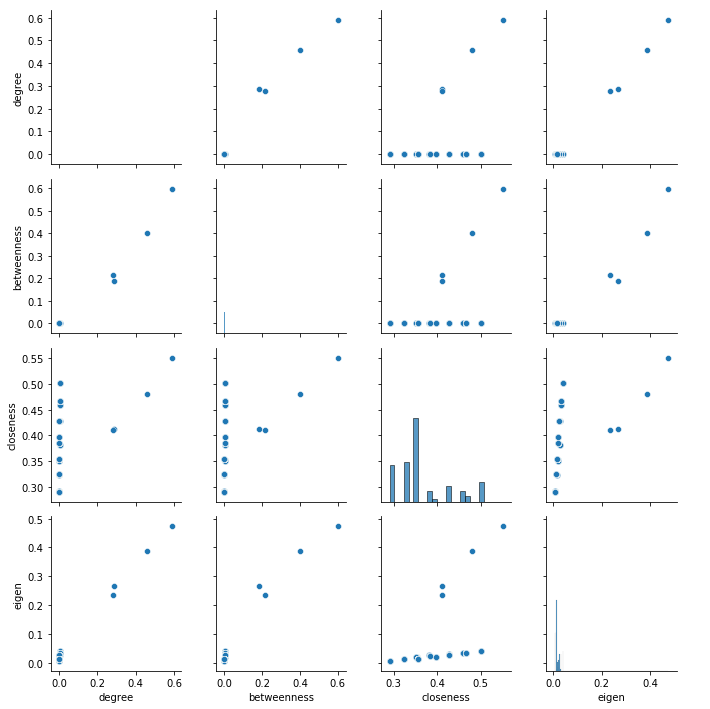

In [248]:
sns.pairplot(dat)

## Centrality Measures Comparisons

In [259]:
grouped=network.groupby(['ethcty','gndr'], as_index='ethcty').mean()[['degree', 'betweenness', 'closeness', 'eigen']]
grouped



degree  betweenness  closeness     eigen
ethcty                     gndr                                              
ASIAN AND PACIFIC ISLANDER FEMALE  0.285479     0.185217   0.412105  0.266178
                           MALE    0.285479     0.185217   0.412105  0.266178
BLACK NON HISPANIC         FEMALE  0.279703     0.212405   0.410152  0.234802
                           MALE    0.279703     0.212405   0.410152  0.234802
HISPANIC                   FEMALE  0.457921     0.401031   0.480380  0.387751
                           MALE    0.457921     0.401031   0.480380  0.387751
WHITE NON HISPANIC         FEMALE  0.590759     0.599343   0.550659  0.472934
                           MALE    0.590759     0.599343   0.550659  0.472934